In [1]:
import pandas as pd

# Load the dataset
CesDataClean = pd.read_csv("CesDataClean.csv")  # assuming it's in the current directory

# Columns to keep
columns_to_keep = [
    "sh_stock_wave9",
    "sh_sav_wave9",
    "sh_mutf_wave9",
    "sh_ira_wave9",
    "sh_bond_wave9",
    "sh_oth_wave9",
    "cons_tot_wave10",
    "cons_tot_wave13"
]

# Create new dataset with only the selected columns
CesDataSubset = CesDataClean[columns_to_keep].copy()

# Save the new dataset (optional)
CesDataSubset.to_csv("CesDataSubset.csv", index=False)

# Preview
print(CesDataSubset.head())



   sh_stock_wave9  sh_sav_wave9  sh_mutf_wave9  sh_ira_wave9  sh_bond_wave9  \
0             NaN           NaN            NaN           NaN            NaN   
1        0.000000      1.000000       0.000000      0.000000       0.000000   
2        0.000000      1.000000       0.000000      0.000000       0.000000   
3        0.000000      0.189215       0.600201      0.210584       0.000000   
4        0.348717      0.036645       0.000000      0.596975       0.017663   

   sh_oth_wave9  cons_tot_wave10  cons_tot_wave13  
0           NaN              NaN              NaN  
1           0.0           1082.0           1310.0  
2           0.0           3650.0           3250.0  
3           0.0           2680.0           2215.0  
4           0.0           3415.0           3741.0  


C:\Users\Zach\AppData\Local\Temp\ipykernel_55788\485231006.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,651,652,653,654,655,656,657,658,659,660,672,683,697,698,699,705,706,707) have mixed types. Specify dtype option on import or set low_memory=False.
  CesDataClean = pd.read_csv("C

In [2]:
import statsmodels.formula.api as smf

# Run a quantile regression at the median (0.5 quantile)
quantile_model = smf.quantreg('cons_tot_wave10 ~ sh_sav_wave9', CesDataSubset)
result = quantile_model.fit(q=0.5)  # q=0.5 for median regression

# Display summary
print(result.summary())


                         QuantReg Regression Results                          
Dep. Variable:        cons_tot_wave10   Pseudo R-squared:              0.01346
Model:                       QuantReg   Bandwidth:                       339.7
Method:                 Least Squares   Sparsity:                        2520.
Date:                Sun, 19 Oct 2025   No. Observations:                 3309
Time:                        00:18:40   Df Residuals:                     3307
                                        Df Model:                            1
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2111.8065     39.950     52.861      0.000    2033.477    2190.136
sh_sav_wave9  -511.8065     56.756     -9.018      0.000    -623.088    -400.525


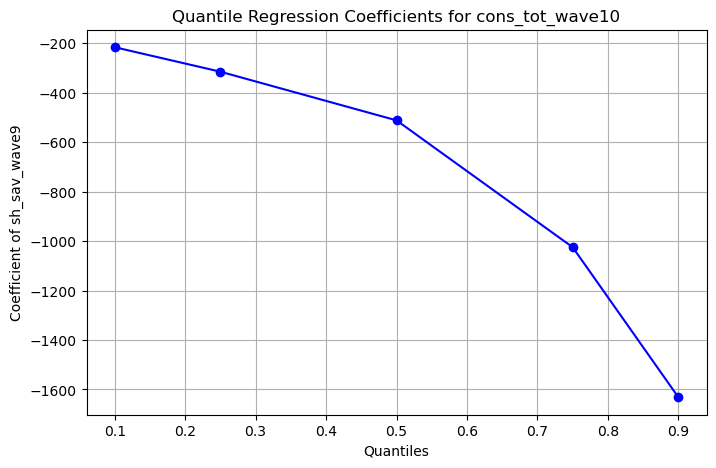

In [3]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define quantiles
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Store results
coefs = []

for q in quantiles:
    model = smf.quantreg('cons_tot_wave10 ~ sh_sav_wave9', CesDataSubset)
    res = model.fit(q=q)
    coefs.append(res.params['sh_sav_wave9'])

# Plot
plt.figure(figsize=(8,5))
plt.plot(quantiles, coefs, marker='o', linestyle='-', color='blue')
plt.xlabel('Quantiles')
plt.ylabel('Coefficient of sh_sav_wave9')
plt.title('Quantile Regression Coefficients for cons_tot_wave10')
plt.grid(True)
plt.show()


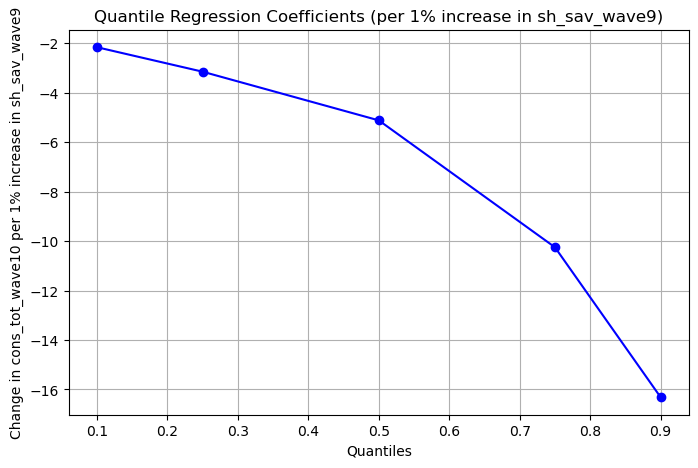

In [4]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define quantiles
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Store scaled coefficients (per 1% increase in sh_sav_wave9)
coefs_per_pct = []

for q in quantiles:
    model = smf.quantreg('cons_tot_wave10 ~ sh_sav_wave9', CesDataSubset)
    res = model.fit(q=q)
    # Scale coefficient to per 1% change in sh_sav_wave9
    coefs_per_pct.append(res.params['sh_sav_wave9'] * 0.01)

# Plot
plt.figure(figsize=(8,5))
plt.plot(quantiles, coefs_per_pct, marker='o', linestyle='-', color='blue')
plt.xlabel('Quantiles')
plt.ylabel('Change in cons_tot_wave10 per 1% increase in sh_sav_wave9')
plt.title('Quantile Regression Coefficients (per 1% increase in sh_sav_wave9)')
plt.grid(True)
plt.show()


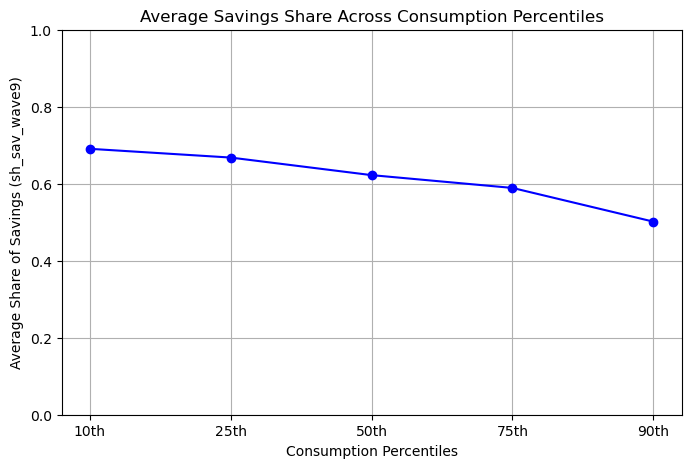

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the percentiles you want
percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]

# Compute the consumption values at these percentiles
cons_values = CesDataSubset['cons_tot_wave10'].quantile(percentiles)

# Compute average sh_sav_wave9 for each percentile group
avg_sh_sav = []
for i, p in enumerate(percentiles):
    if i == 0:
        # Bottom 10%
        group = CesDataSubset[CesDataSubset['cons_tot_wave10'] <= cons_values[p]]
    else:
        # Between previous percentile and current
        group = CesDataSubset[(CesDataSubset['cons_tot_wave10'] > cons_values[percentiles[i-1]]) &
                              (CesDataSubset['cons_tot_wave10'] <= cons_values[p])]
    avg_sh_sav.append(group['sh_sav_wave9'].mean())

# Labels for x-axis
labels = ['10th', '25th', '50th', '75th', '90th']

# Plot
plt.figure(figsize=(8,5))
plt.plot(labels, avg_sh_sav, marker='o', linestyle='-', color='blue')
plt.xlabel('Consumption Percentiles')
plt.ylabel('Average Share of Savings (sh_sav_wave9)')
plt.title('Average Savings Share Across Consumption Percentiles')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


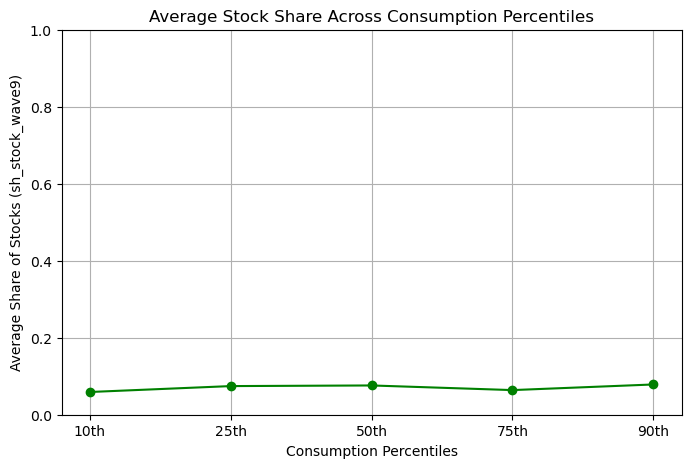

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the percentiles you want
percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]

# Compute the consumption values at these percentiles
cons_values = CesDataSubset['cons_tot_wave10'].quantile(percentiles)

# Compute average sh_stock_wave9 for each percentile group
avg_sh_stock = []
for i, p in enumerate(percentiles):
    if i == 0:
        # Bottom 10%
        group = CesDataSubset[CesDataSubset['cons_tot_wave10'] <= cons_values[p]]
    else:
        # Between previous percentile and current
        group = CesDataSubset[(CesDataSubset['cons_tot_wave10'] > cons_values[percentiles[i-1]]) &
                              (CesDataSubset['cons_tot_wave10'] <= cons_values[p])]
    avg_sh_stock.append(group['sh_stock_wave9'].mean())

# Labels for x-axis
labels = ['10th', '25th', '50th', '75th', '90th']

# Plot
plt.figure(figsize=(8,5))
plt.plot(labels, avg_sh_stock, marker='o', linestyle='-', color='green')
plt.xlabel('Consumption Percentiles')
plt.ylabel('Average Share of Stocks (sh_stock_wave9)')
plt.title('Average Stock Share Across Consumption Percentiles')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


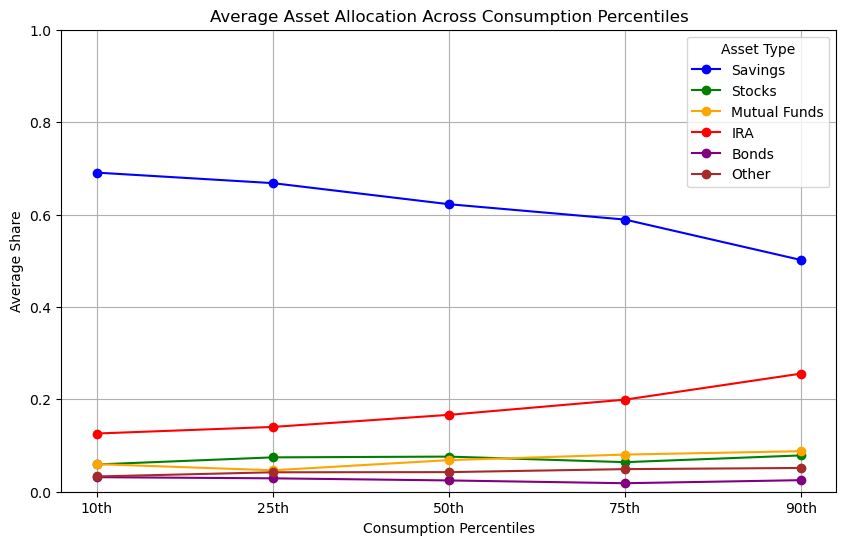

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping of variables to asset labels
asset_labels = {
    'sh_sav_wave9': 'Savings',
    'sh_stock_wave9': 'Stocks',
    'sh_mutf_wave9': 'Mutual Funds',
    'sh_ira_wave9': 'IRA',
    'sh_bond_wave9': 'Bonds',
    'sh_oth_wave9': 'Other'
}

# Define the consumption percentiles to use
percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]
cons_values = CesDataSubset['cons_tot_wave10'].quantile(percentiles)

# Labels for x-axis
labels = ['10th', '25th', '50th', '75th', '90th']

# Prepare data: compute average for each share variable at each percentile
avg_shares = {asset: [] for asset in asset_labels.values()}

for i, p in enumerate(percentiles):
    if i == 0:
        group = CesDataSubset[CesDataSubset['cons_tot_wave10'] <= cons_values[p]]
    else:
        group = CesDataSubset[(CesDataSubset['cons_tot_wave10'] > cons_values[percentiles[i-1]]) &
                              (CesDataSubset['cons_tot_wave10'] <= cons_values[p])]
    for var, asset in asset_labels.items():
        avg_shares[asset].append(group[var].mean())

# Plot all asset types
plt.figure(figsize=(10,6))
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

for asset, color in zip(avg_shares.keys(), colors):
    plt.plot(labels, avg_shares[asset], marker='o', linestyle='-', color=color, label=asset)

plt.xlabel('Consumption Percentiles')
plt.ylabel('Average Share')
plt.title('Average Asset Allocation Across Consumption Percentiles')
plt.ylim(0, 1)
plt.grid(True)
plt.legend(title='Asset Type')

plt.savefig("asset_allocation_by_consumption.pdf", format='pdf', bbox_inches='tight')

plt.show()
